<h1>Breast Cancer Detection with Different methods</h1>
<h4>Breast cancer detection is a simple project that can be done with multiple approaches. In this notebook, we will explore
the ways that this project can be handled.</h4>


<h1> Using Support Vector Clasifier(SVC)</h1>
SVC is a popular way to handle this process as it's very less time consuming and quite simple to do as well.
To use SVC in this project we will be using `SVC` class from  `sklearn.svm` module.
<h4>Let's get started!</h4>

We'll start off by importing the necessary packages, including but not limited to LogisticRegression, SVC, pandas and so on.

In [55]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [34]:
df=pd.read_csv("breast-cancer.csv")#Reading the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
#Preprocessing the data by dropping un-necessary columns and empty data
df=df.dropna()
df=df.drop(columns=['id'])
df=df.drop_duplicates()
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
# Separate features (X) and labels (y)
X = df.drop(['diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Labels

Here, `X` contains everything in the `df`  other than `diagnosis` column and `y` contains only `diagnosis` column.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)#Splitting train and test data

The `test_size` parameter is the percentage of the data that will be used for testing our model.So, a `test_size` of 0.8 means that 80% of the data will be used for testing and the rest will be used for training the model.

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Here, we standardize out data with the help of `StandardScalar()`.`StandardScalar()` handles feature standardizition by removing the mean of data and scaling the data to unit variance. <b>Removing Mean</b> means that the mean of the data will be subtracted from each of the data points. <b>Scaling to unit variance</b> is done to ensure that the data spread evenly across the features. To achieve this we divide each data point by the standard deviation of the data. In conclusion, Standardization of data means to ensure that the data has comparable scale across features and is centered around 0.

In [39]:
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test_scaled)

Since our data is nonlinear, we use the `Radial Basis Function (RBF)` kernel as our kernel function in the Support Vector Machine (SVM) model. The RBF kernel effectively maps the data into a higher-dimensional space, allowing for the creation of complex, nonlinear decision boundaries. This enables the SVM to capture intricate patterns in the data, making it suitable for a wide range of classification tasks.

In [42]:
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       290
           M       0.95      0.93      0.94       166

    accuracy                           0.96       456
   macro avg       0.96      0.95      0.95       456
weighted avg       0.96      0.96      0.96       456



Finally, we can display the results of the classification and the accuracy report.

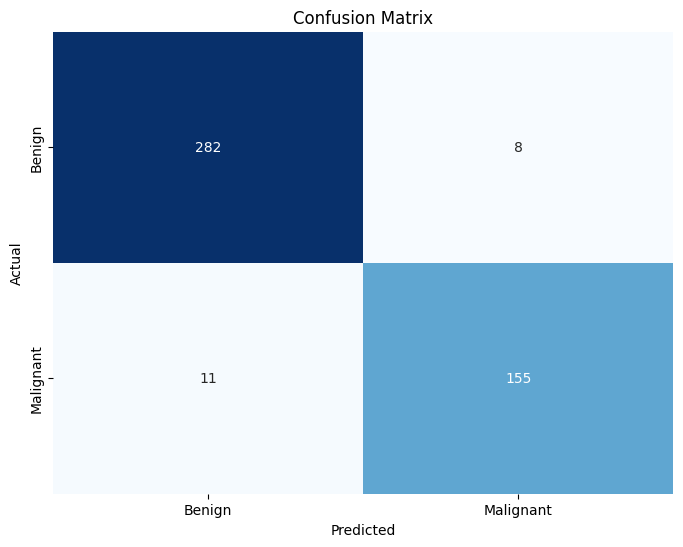

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1>Using `Logistic Regression` instead of `SVC` </h1>

We can use `Logistic Regression` instead of `SVC` to predict the outcome of the data in a similar way. To do this, we can simply use the `Logistic Regression` function instead of the `SVC` function.

In [44]:
logistic_model = LogisticRegression(random_state=42)#Defining the model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [45]:
y_pred = logistic_model.predict(X_test_scaled)#Making predictions


In [48]:
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logreg)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9758771929824561
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       290
           M       0.97      0.96      0.97       166

    accuracy                           0.98       456
   macro avg       0.97      0.97      0.97       456
weighted avg       0.98      0.98      0.98       456



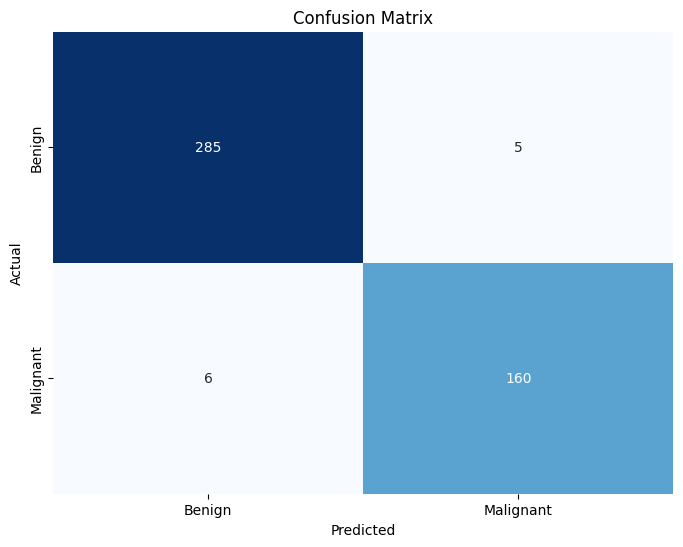

In [47]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In logistic regression, we can visualize results in an `ROC-AUC` curve, to do this we use the `roc_auc` metric.

In [53]:
y_test_binary = y_test.map({'B': 0, 'M': 1})#Mapping data to binary probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
auc = roc_auc_score(y_test_binary, y_pred_proba)

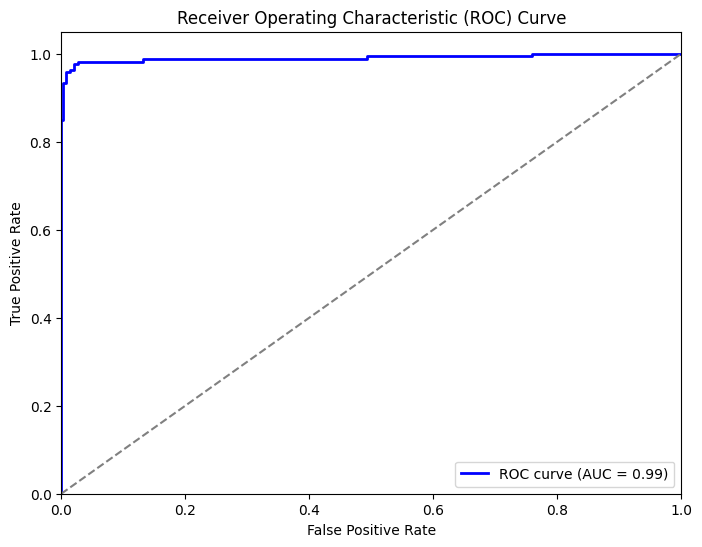

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h1>Using k-NN</h1>
We can use `k-NN` to predict if the data indicates cancer or not. This is also very similar to the previous examples.

In [56]:
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn_model.predict(X_test_scaled)


In [60]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       290
           M       0.95      0.93      0.94       166

    accuracy                           0.96       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.96      0.96      0.96       456



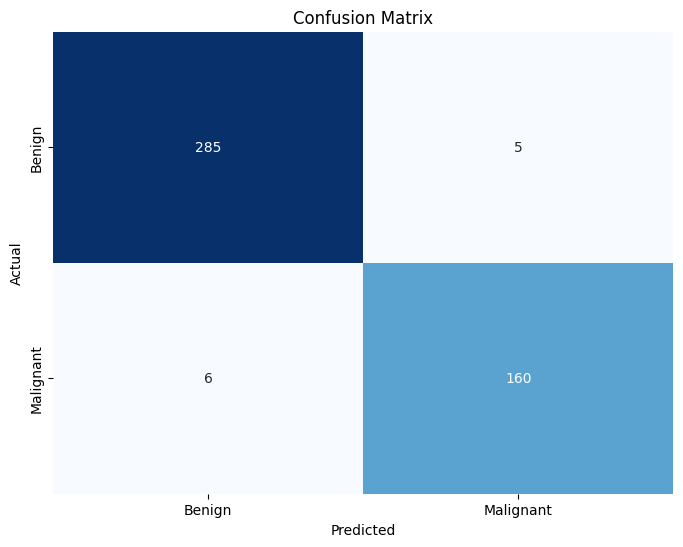

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print("k-NN accuracy:",accuracy_knn*100,'%')
print("Logistic Regression accuracy:",accuracy_logreg*100,'%')
print("SVC accuracy:",accuracy_svc*100,'%')

k-NN accuracy: 95.6140350877193 %
Logistic Regression accuracy: 97.58771929824562 %
SVC accuracy: 95.83333333333334 %


Since, LogisticRegression has the most accuracy, it the best way to handle this project. However, the accuracy of the model is very dependent on the dataset used. Therefore, it may be different if used with other datasets.